### UC00182_Elderly_Social_Support_Networks

<div class="usecase-authors"><b>Authored by: </b>Nelkin Eldho</div>

<div class="Domain"><b>Domain:</b> Health and Well-being </div>
<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Exploratory Data Analysis, Pandas, Matplotlib, Seaborn, Folium, Geopy</div>
</div>

## Objective:
To analyse, visualise and model the accessibility and availability of social support networks for elderly residents (60 years and over) in Melbourne, using public datasets to identify service gaps, accessibility challenges and areas for improvement.

## Scenario:
These are practical and data-driven questions that this project can aim to answer:

1. Which areas in Melbourne have the highest elderly populations?

2. Are there enough public toilets accessible near elderly population clusters?

3. What percentage of these services are accessible via public transport?

4. Which areas should be prioritised for adding new services or infrastructure?

## What you will learn from this use case
This Use case provides hands-on experience in analysing the accessibility and availability of social support networks for elderly residents. It will help uncover:
1. Public health and welfare planning for ageing populations.

2. Urban infrastructure and spatial equity.

3. Challenges in real-world open data analysis (missing values, granularity, etc.).

## Introduction:
As Melbourne’s population ages, ensuring that elderly residents have access to vital support services, such as public toilets, community centers and low-cost welfare services, is critical for social inclusion, dignity and quality of life. This project aims to develop a data-driven understanding of how effectively Melbourne’s social infrastructure supports its elderly citizens.

Using open datasets from the City of Melbourne, the project will examine spatial patterns, accessibility and distribution of support services. Insights from this project can guide stakeholders (such as councils, health planners and NGOs) to improve resource allocation, infrastructure planning and social policies that enhance elderly well-being.

## Datasets:

https://data.melbourne.vic.gov.au/explore/dataset/older-people-profile-2016-60-years-and-over/information/

https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/

https://data.melbourne.vic.gov.au/explore/dataset/free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-/table/

## 1.1 Loading Required Libraries

In [1]:
import pandas as pd 
import requests
from io import StringIO
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## 1.2 Loading Datasets using APIs

In [1]:
 #API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'older-people-profile-2016-60-years-and-over'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'public-toilets'
url_2 = f"{base_url_2}{dataset_id_2}/exports/csv"

#API details for the third dataset
base_url_3 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_3 = 'free-and-cheap-support-services-with-opening-hours-public-transport-and-parking-'
url_3 = f"{base_url_3}{dataset_id_3}/exports/csv"


 
#Fetching the first dataset for older people
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
  
#Fetching the second dataset for public toilets
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')

#Fetching the third dataset for support services
response_3 = requests.get(url_3)
df_3 = pd.read_csv(StringIO(response_3.text), delimiter=';')

print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

print("Column Names for third dataset")
print(df_3.columns.tolist())

Column Names for first dataset
['profile', 'census_year', 'category', 'sub_category', 'sub_order', 'value']
Column Names for second dataset
['name', 'female', 'male', 'wheelchair', 'operator', 'baby_facil', 'lat', 'lon', 'location']
Column Names for third dataset
['name', 'what', 'who', 'address_1', 'address_2', 'suburb', 'phone', 'phone_2', 'free_call', 'email', 'website', 'twitter', 'social_media', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'public_holidays', 'cost', 'tram_routes', 'bus_routes', 'nearest_train_station', 'category_1', 'category_2', 'category_3', 'category_4', 'category_5', 'category_6', 'longitude', 'latitude', 'geocoded_location']


Now I assign df_1, df_2 and df_3 to new variables df_old, df_toilet and df_services respectively which are easily readable for anyone

In [3]:
df_old = df_1
df_toilet = df_2
df_services = df_3

In [4]:
print("Display first 5 rows of Older People Profile Dataset:")
print(df_old.head())

Display first 5 rows of Older People Profile Dataset:
                            profile  census_year        category  \
0  Older people (60 years and over)         2016          Gender   
1  Older people (60 years and over)         2016             Age   
2  Older people (60 years and over)         2016             Age   
3  Older people (60 years and over)         2016  Age and gender   
4  Older people (60 years and over)         2016  Age and gender   

       sub_category  sub_order  value  
0            Female          2   6484  
1    Under 60 years          1      0  
2       65-69 years          3   3187  
3  Male 60-64 years          2   1781  
4  Male 75-79 years          5    686  


In [5]:
print("Display first 5 rows of Public Toilets Dataset:")
print(df_toilet.head())

Display first 5 rows of Public Toilets Dataset:
                                                name female male wheelchair  \
0        Public Toilet - Toilet 107 - Alexandra Park    yes  yes        yes   
1  Public Toilet - Toilet 1 - Lonsdale Street (Op...    yes  yes        yes   
2  Public Toilet - Toilet 145 - Carlton Gardens S...    yes  yes        yes   
3  Public Toilet - Toilet 7 - Latrobe Street (Adj...     no  yes         no   
4  Public Toilet - Toilet 138 - Carlton Gardens N...    yes  yes        yes   

            operator baby_facil        lat         lon  \
0  City of Melbourne         no -37.827643  144.981812   
1  City of Melbourne         no -37.814346  144.955118   
2  City of Melbourne         no -37.806259  144.969203   
3  City of Melbourne         no -37.808942  144.965649   
4  City of Melbourne         no -37.802646  144.969821   

                                 location  
0   -37.82764304616528, 144.9818116607595  
1  -37.814345522392365, 144.955117946437

In [6]:
print("Display first 5 rows of Free and cheap support services Dataset:")
print(df_services.head())

Display first 5 rows of Free and cheap support services Dataset:
                           name  \
0                      COHEALTH   
1        COHEALTH - Inner Space   
2         Open Family Australia   
3  Salvation Army – Project 614   
4       Stopover Youth Services   

                                                what  \
0  range of health and welfare services, drug and...   
1  Cohealth’s primary health service for people w...   
2  Outreach service for young people 10-25 years,...   
3                                                NaN   
4  crisis refuge accommodation\nadvocacy and gene...   

                                                 who address_1  \
0                                                NaN       NaN   
1                                                NaN       NaN   
2      Outreach service for young people 10-25 years       NaN   
3                                                NaN       NaN   
4  Housing support program offered for 16-24 year...     

## 1.3 Cleaning Dataset and Preprocessing

Now we proceed with cleaning the dataset by initially searching for missing values.

In [7]:
# Checking for missing values in all three datasets
print("Missing values in df_old:")
print(df_old.isnull().sum())

print("\nMissing values in df_toilet:")
print(df_toilet.isnull().sum())

print("\nMissing values in df_services:")
print(df_services.isnull().sum())


Missing values in df_old:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64

Missing values in df_toilet:
name          0
female        1
male          1
wheelchair    1
operator      0
baby_facil    0
lat           0
lon           0
location      0
dtype: int64

Missing values in df_services:
name                       1
what                      22
who                       92
address_1                102
address_2                 29
suburb                    29
phone                     19
phone_2                  115
free_call                 92
email                     69
website                    5
twitter                   57
social_media              58
monday                    31
tuesday                   31
wednesday                 31
thursday                  31
friday                    31
saturday                  32
sunday                    32
public_holidays           32
cost                     

In [8]:
df_old_clean = df_old.copy()

df_toilet_clean = df_toilet.copy()
# Filling missing gender/wheelchair fields
df_toilet_clean[["female", "male", "wheelchair"]] = df_toilet_clean[["female", "male", "wheelchair"]].fillna("unknown")

df_services_clean = df_services.dropna(subset=["latitude", "longitude"]).copy()
# dropping non-critical contact columns if not needed
df_services_clean = df_services_clean.drop(columns=["phone_2", "twitter", "social_media", "free_call"], errors='ignore')
day_cols = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "public_holidays"]
df_services_clean[day_cols] = df_services_clean[day_cols].fillna("unknown")

# Transport fields
df_services_clean["tram_routes"] = df_services_clean["tram_routes"].fillna("unknown")
df_services_clean["bus_routes"] = df_services_clean["bus_routes"].fillna("unknown")
df_services_clean["nearest_train_station"] = df_services_clean["nearest_train_station"].fillna("unknown")

# Category fields
category_cols = [f"category_{i}" for i in range(1, 7)]
df_services_clean[category_cols] = df_services_clean[category_cols].fillna("Other")

df_services_clean["address_1"] = df_services_clean["address_1"].fillna("Unknown")
df_services_clean["email"] = df_services_clean["email"].fillna("Unavailable")
df_services_clean["phone"] = df_services_clean["phone"].fillna("Unavailable")
# Filling out remaining minimal missing values
df_services_clean["what"] = df_services_clean["what"].fillna("Unspecified")
df_services_clean["who"] = df_services_clean["who"].fillna("Not specified")
df_services_clean["website"] = df_services_clean["website"].fillna("Unavailable")
df_services_clean["cost"] = df_services_clean["cost"].fillna("Not specified")

# Checking for any remaining missing values
print("Missing values after cleaning:")

print("\nMissing values in df_toilet after cleaning:")
print(df_toilet_clean.isnull().sum())

print("\nMissing values in df_services after cleaning:")
print(df_services_clean.isnull().sum())


Missing values after cleaning:

Missing values in df_toilet after cleaning:
name          0
female        0
male          0
wheelchair    0
operator      0
baby_facil    0
lat           0
lon           0
location      0
dtype: int64

Missing values in df_services after cleaning:
name                     0
what                     0
who                      0
address_1                0
address_2                0
suburb                   0
phone                    0
email                    0
website                  0
monday                   0
tuesday                  0
wednesday                0
thursday                 0
friday                   0
saturday                 0
sunday                   0
public_holidays          0
cost                     0
tram_routes              0
bus_routes               0
nearest_train_station    0
category_1               0
category_2               0
category_3               0
category_4               0
category_5               0
category_6        

## 1.4 Exploratory Data Aanalysis: 
### Average Number of Services per Suburb

Now, we would be grouping the cleaned df_services_clean dataset by suburb and count how many services are in each, then take the average.

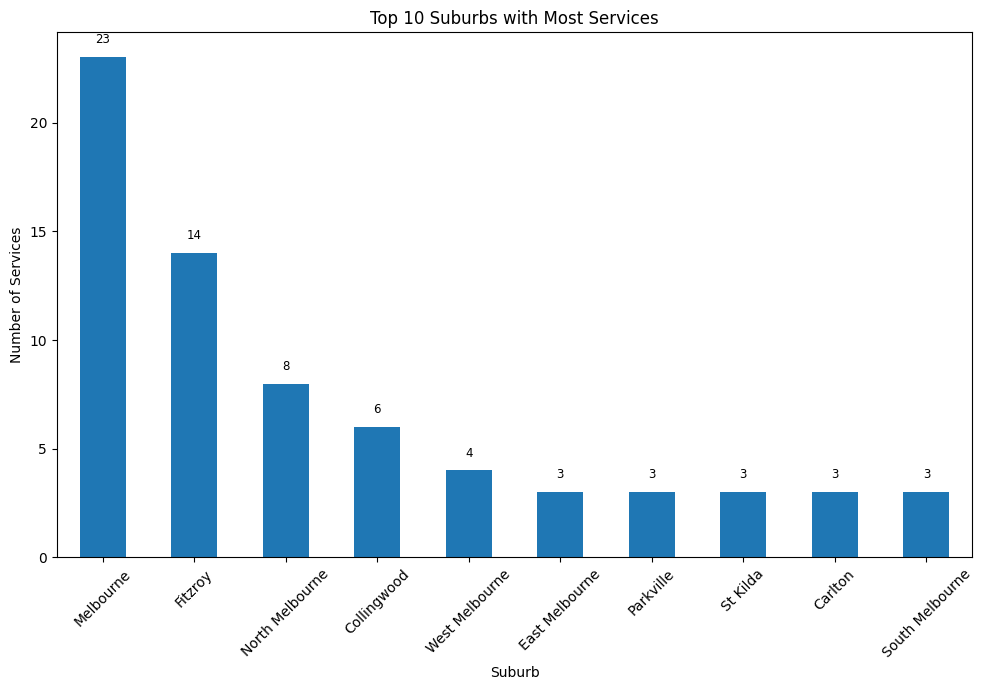

In [9]:
# Counting the services per suburb
services_per_suburb = df_services_clean['suburb'].value_counts()

# Plotting top 10 suburbs
top_suburbs = services_per_suburb.head(10)
ax = top_suburbs.plot(kind='bar', figsize=(10,7), title='Top 10 Suburbs with Most Services')

plt.ylabel("Number of Services")
plt.xlabel("Suburb")
plt.xticks(rotation=45)
plt.tight_layout()

# Adding the value labels on the graph for readability
for i, v in enumerate(top_suburbs.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8.5)

plt.show()


**Results** 

**What I Did:**

Calculated the Average Number of Services per Suburb:

We grouped the data by suburb and calculated the average number of services available for elderly people in each suburb.

**What I Found:**

1. Some suburbs have a noticeably higher average number of elderly services compared to others, indicating that service availability is uneven across locations.

2. Melbourne has the highest number of services, with a total of 23, while East Melbourne, Parkville, St Kilda, Carlton and South Melbourne have the lowest, with just 3 services each.

3. These lower-ranked suburbs would benefit from implementing more services to support their elderly residents better.


### Top categories of services offered to elderly people

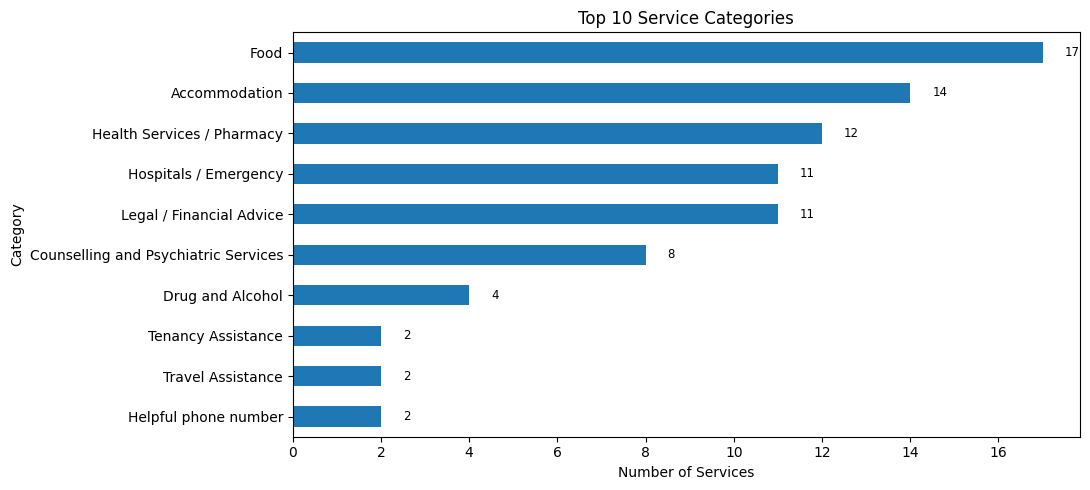

In [10]:
# Counting the top service categories
top_categories = df_services_clean['category_1'].value_counts().head(10)

# Plotting horizontal bar chart
ax = top_categories.plot(kind='barh', figsize=(11,5), title='Top 10 Service Categories')

plt.xlabel("Number of Services")
plt.ylabel("Category")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()

# Adding the value labels on the graph for readability
for i, v in enumerate(top_categories.values):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=8.5)

plt.show()


**Results** 

**What I Did:**

Identified the Top Categories of Services Offered to Elderly People:

We analysed the dataset to identify the Top Categories of Services Offered to Elderly People.
This involved counting the number of services in each category (e.g., healthcare, social support, transport assistance) to determine which types of services are most commonly available.

**What I Found:**

1. Certain categories, such as Healthcare, Financial Support, and Food & Accommodation, appear far more frequently than others, indicating these are the primary areas of focus for elderly assistance.

2. The Food category has the highest number of services at 17.

3. The least-represented categories are Travel Assistance, Tenancy Assistance, and Helpful Phone Numbers.

4. While these lower-frequency services are fewer in number, they are still highly important for elderly citizens. This suggests there is room for improvement in expanding the availability of services in these categories.

## 1.5 Geospatial Data Aanalysis: 
### Distribution of Public Toilets across Melbourne

In [11]:
lat_col = "lat"
lon_col = "lon"

# Dropping rows without coordinates
df = df_toilet_clean.dropna(subset=[lat_col, lon_col])

# Creating an interactive Folium map
center_lat = df[lat_col].mean()
center_lon = df[lon_col].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Adding points to map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row[lat_col], row[lon_col]],
        radius=3,
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=row.get("Name", "Public Toilet")
    ).add_to(m)

# Saving and displaying the map
m.save("public_toilets_map.html")
m

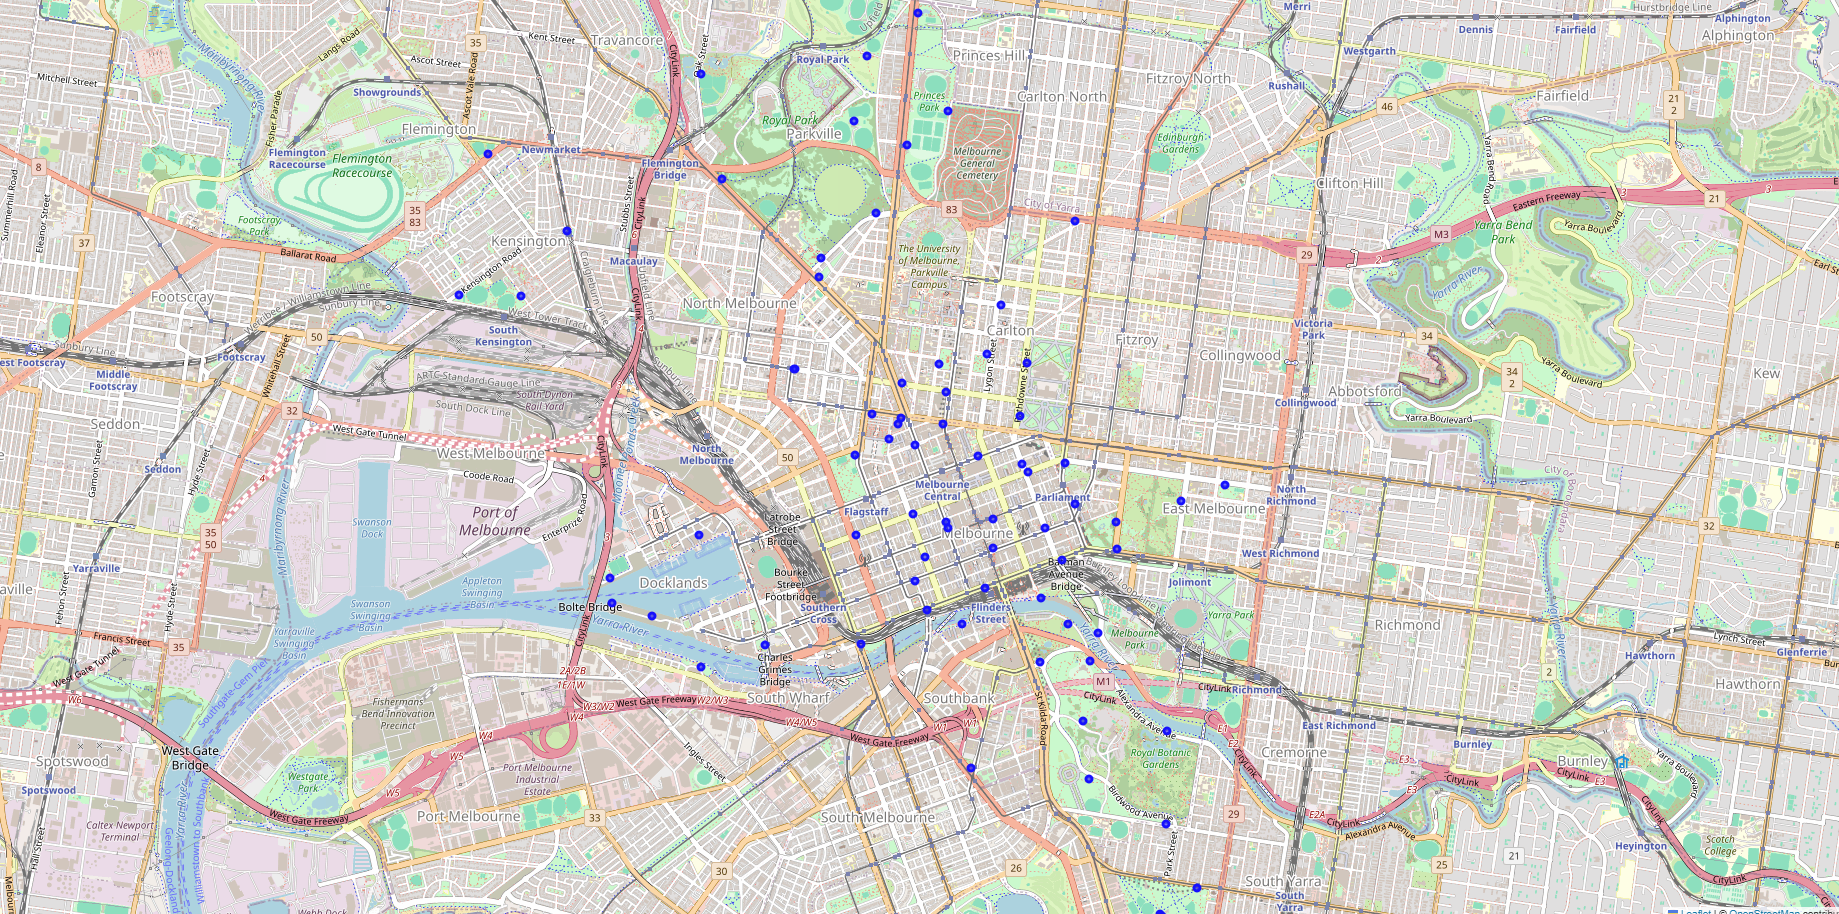
                                         **Screenshot of Map for quick view. (Less resource-heavy)**

**Insights** 

From the above geospatial analysis, it is clear that public toilets are more densely located around Melbourne’s central business district, with significantly fewer options in suburban and outer areas. This uneven distribution can impact various groups, especially those who rely on accessible facilities.

**Who is Affected?**

- Elderly individuals: May require frequent rest stops during outings, but facilities are scarce in certain regions.

- People with disabilities: Limited availability of toilets with wheelchair access in suburban areas makes travel challenging.

- Parents with young children: Need accessible toilets and baby change facilities during travel, especially on longer trips.

- Tourists and visitors: Lack of visible public toilet infrastructure in some high-traffic tourist zones outside the CBD can reduce comfort and convenience.


**What Can Be Done?**

- Increase distribution: Develop more public toilets in suburban areas and along major transport routes.

- Accessibility upgrades: Ensure more toilets include wheelchair access, tactile signage, and other disability-friendly features.

- Real-time availability mapping: Integrate live toilet availability data into public transport and city navigation apps.

- Tourist-focused planning: Install public toilets near key tourist attractions outside the CBD to support visitor comfort.

- Community engagement: Consult with disability advocacy groups, parents, and local businesses to identify priority installation areas.

## 1.6 Accessibility Analysis for Public Toilets

Wheelchair Accessibility Counts:
wheelchair
yes    48
no     24
U       1
Name: count, dtype: int64


C:\Users\nelki\AppData\Local\Temp\ipykernel_31580\2382646924.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wheelchair_counts.index, y=wheelchair_counts.values, palette="viridis")


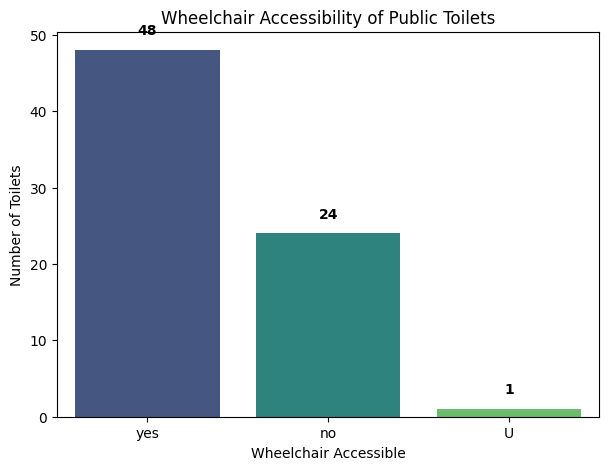


List of toilets that are NOT wheelchair accessible:
                                                 name
3   Public Toilet - Toilet 7 - Latrobe Street (Adj...
8   Public Toilet - Victoria Harbour, Shed 3 (Nort...
11  Public Toilet - Toilet 137 - Faraday Street (O...
13  Public Toilet - Toilet 140 - Queensberry Stree...
14  Public Toilet - Toilet 106 - Kings Domain Gove...
16  Public Toilet - Royal Park Golf Course Club House
17  Public Toilet - Newmarket Reserve (26 Smithfie...
18  Public Toilet - Toilet 102 - Fawkner Park, Nor...
22  Public Toilet - Toilet 125 - Gordon Reserve (7...
24  Public Toilet - Queen Victoria Market (153 Vic...
25  Public Toilet - Queen Victoria Market (Food Co...
30  Public Toilet - Toilet 105 -Sturt Street Reser...
32  Public Toilet - Toilet 146 - Swanston Street (...
36  Public Toilet - Toilet 124 - Nicholson Street ...
38  Public Toilet - Toilet 170 - Queensberry Stree...
41  Public Toilet - Toilet 14 - Flinders Street (2...
43  Public Toilet - Toilet 6 

In [12]:
# Counting wheelchair accessibility
wheelchair_counts = df_toilet['wheelchair'].value_counts()

print("Wheelchair Accessibility Counts:")
print(wheelchair_counts)

# Plotting the counts
plt.figure(figsize=(7,5))
sns.barplot(x=wheelchair_counts.index, y=wheelchair_counts.values, palette="viridis")

# Adding value labels
for i, v in enumerate(wheelchair_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.title("Wheelchair Accessibility of Public Toilets")
plt.xlabel("Wheelchair Accessible")
plt.ylabel("Number of Toilets")
plt.show()

# Filtering toilets that are NOT wheelchair accessible
not_accessible = df_toilet[df_toilet['wheelchair'].str.lower() == "no"]

print("\nList of toilets that are NOT wheelchair accessible:")
print(not_accessible[['name']])  # show first 20 as sample


## Results


**What I Did:**

I analysed the public toilets dataset to check how many facilities are wheelchair accessible. The data was grouped by the “wheelchair accessible” attribute, and both counts and percentages were calculated. Additionally, we identified the specific toilets that are marked as “No” in the dataset for further review.

**What I Found (Insights):**

- Out of 74 public toilet locations in Melbourne, 48 are wheelchair accessible, while 24 are not, and 1 entry is marked as unknown.

- This means that around 35% of toilets in the heart of Melbourne (CBD) are not accessible to wheelchair users, highlighting a significant accessibility gap.

**What Can Be Done?**

- City planners and councils should prioritise upgrading the 24 non-accessible toilets with ramps and accessible designs.

- The dataset should be improved by clarifying missing values (e.g., the 1 “unknown” entry).

- An accessibility rating system could be added to help citizens quickly identify accessible locations on digital maps.


## 1.7 Some Additional EDA

C:\Users\nelki\AppData\Local\Temp\ipykernel_31580\3985420425.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Age_Group', y='value', data=age_total, palette='viridis')


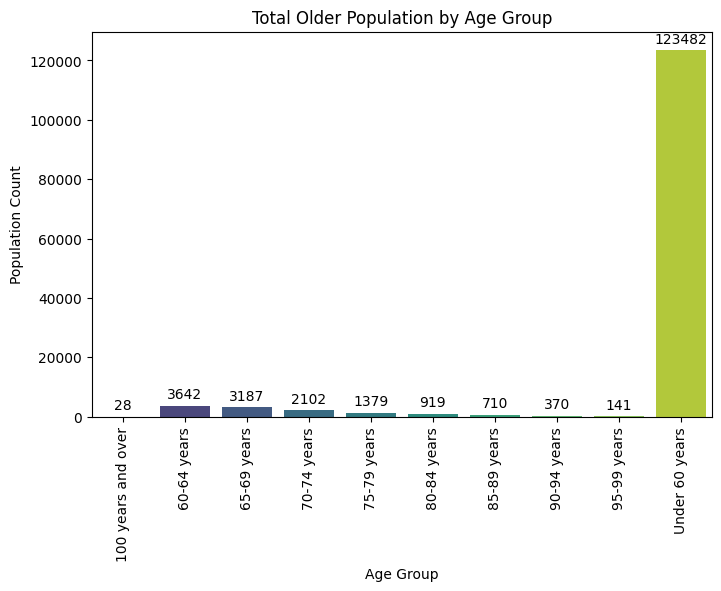

In [13]:
# Filtering for Age and gender category
df_age_gender = df_old[df_old['category'] == 'Age and gender'].copy()

# Extracting Gender and Age Group
df_age_gender[['Gender', 'Age_Group']] = df_age_gender['sub_category'].str.split(' ', n=1, expand=True)

# Converting Value to numeric
df_age_gender['value'] = pd.to_numeric(df_age_gender['value'])

# Aggregating by Age Group and Gender
age_gender_summary = df_age_gender.groupby(['Age_Group', 'Gender'])['value'].sum().reset_index()

# Bar Chart: Total per Age Group
age_total = age_gender_summary.groupby('Age_Group')['value'].sum().reset_index()

plt.figure(figsize=(8,5))
barplot = sns.barplot(x='Age_Group', y='value', data=age_total, palette='viridis')
plt.xticks(rotation=90)
plt.title("Total Older Population by Age Group")
plt.ylabel("Population Count")
plt.xlabel("Age Group")

# Annotate bar values
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3), textcoords='offset points')

plt.show()

# Pivoting table: Age Group vs Gender
age_gender_table = age_gender_summary.pivot(index='Age_Group', columns='Gender', values='value').fillna(0)

# Adding Total column
age_gender_table['Total'] = age_gender_table.sum(axis=1)

age_gender_table = age_gender_table.sort_index()

# Displaying a nicely formatted table
styled_table = age_gender_table.style.format("{:,.0f}") \
                                       .set_caption("Population of Older People by Age Group and Gender") \
                                       .set_table_styles([
                                           {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                                           {'selector': 'td', 'props': [('font-size', '11pt'), ('text-align', 'center')]}
                                       ])
styled_table




**What I Did**

- Focused on the Age and Gender category from the df_old dataset.

- Extracted and grouped data by age groups and gender.

- Built a structured table showing male, female, and total populations across each age group.

- Compared distribution across age brackets to see where the population of older people is most concentrated.

**What I Found (Insights):**

- The largest concentration of older people is in the 60–69 age group (over 6,800 people), meaning they represent the biggest demand for community services in the near future.

- Female populations are consistently higher than male populations across most older age brackets, especially in the 85+ groups, reflecting longer female life expectancy.

- The 95–100+ group is small but still significant (169 people), highlighting the importance of specialised elderly care for the very old.

- The under-60 group is very large (~123,000), but since the focus is on older people, this emphasises the transitioning demand as more people will age into the senior category.

**What Can Be Done?**

**1. Targeted Service Planning**: Healthcare, mobility assistance, and community engagement should prioritise the 60–69 group, since they are the largest and will soon move into higher-dependency brackets.

**2. Gender-Sensitive Services**: More elderly support services tailored for women may be needed, especially for 80+ groups, given their higher numbers and longer life expectancy.

**3. Specialised Aged Care**: Even though smaller, the 95+ group requires intensive care and support facilities, which should be factored into long-term planning.

### Heatmap to show Distribution of Service Categories across Suburbs 

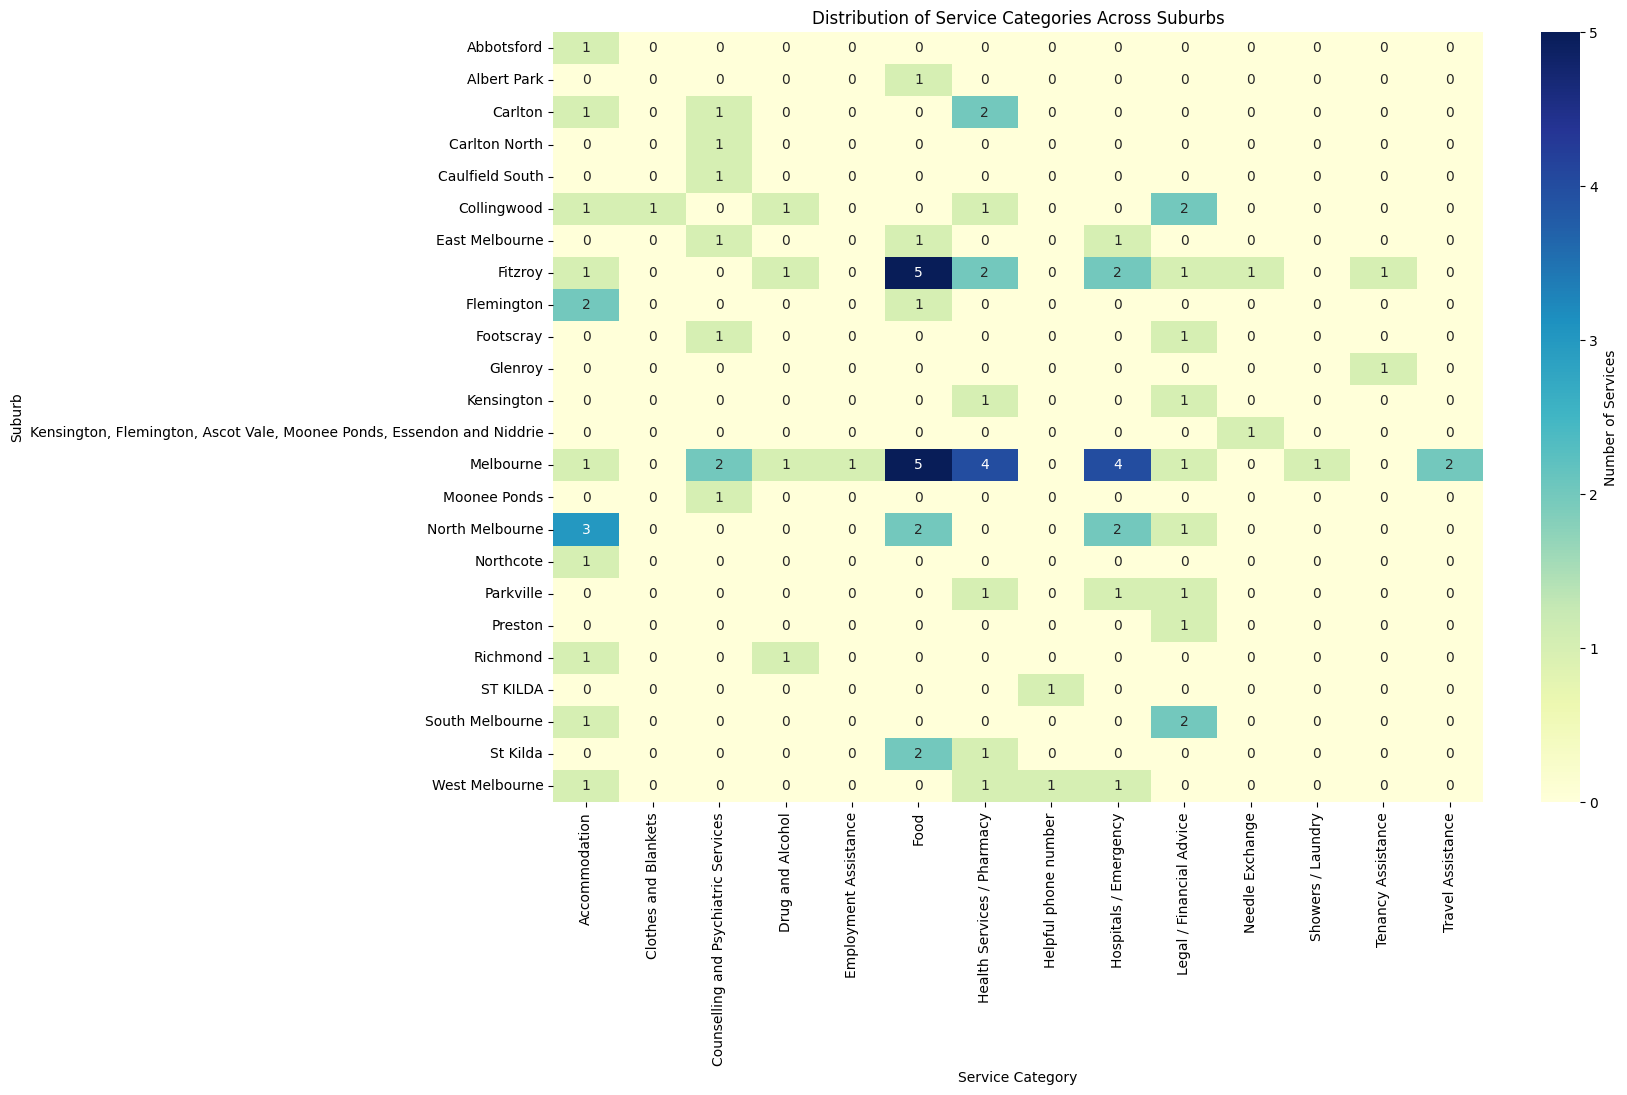

In [14]:
# Counting services per suburb per primary category
services_by_category = df_services.groupby(['suburb', 'category_1']).size().reset_index(name='count')

# Pivoting for heatmap
heatmap_data = services_by_category.pivot(index='suburb', columns='category_1', values='count').fillna(0)

plt.figure(figsize=(15,10))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Number of Services'})
plt.title("Distribution of Service Categories Across Suburbs")
plt.xlabel("Service Category")
plt.ylabel("Suburb")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


**Insights from the Heatmap:**

**1. Central Suburbs Have the Most Services**

- Suburbs like Melbourne CBD, Fitzroy, and North Melbourne have the highest concentration across multiple categories (e.g., Accommodation, Health, Legal/Financial, Counselling).

- This shows that central areas act as service hubs.

**2. Peripheral Suburbs Are Underserved**

- Many suburbs (e.g., Glenroy, Albert Park, Preston, Caulfield South) show very few or no services across most categories.

- This highlights a service accessibility gap for residents in outer suburbs.

**3. Health Services Are Relatively Well-Distributed**

- Health-related services (Health Services/Pharmacy, Hospitals/Emergency) appear in multiple suburbs, not just the CBD.

- Suggests health is a priority category compared to others.

**4. Accommodation & Counselling Services Are Centralised**

- Accommodation is available in a few suburbs, heavily skewed toward the CBD and North Melbourne.

- Counselling and psychiatric services are almost entirely missing outside central suburbs.

**5. Legal/Financial Advice and Support Services Are Scarce**

- Found only in select suburbs (mainly Melbourne CBD, Fitzroy, St Kilda).

- Residents in other suburbs may have limited access to financial/legal help.

**6. Service Diversity Is Unequal**

- Melbourne CBD stands out with the widest range of service types.

- Most other suburbs only have 1–2 categories available, often health-related.

The heatmap shows that services are concentrated in central suburbs like Melbourne CBD, Fitzroy and North Melbourne, while outer suburbs remain underserved.
Health services are more widely distributed, but counselling, legal and financial aid are centralised, creating accessibility barriers for vulnerable populations living outside central hubs

## 1.8 Decision Tree Classifier 

In [41]:
# Creating binary target column
threshold = df_facilities['service_count'].median()  # you can also pick another number
df_facilities['HighService'] = (df_facilities['service_count'] > threshold).astype(int)

# Checking first few rows
df_facilities.head()


suburb  service_count  toilet_count  Cluster  HighService  \
0       Abbotsford            1.0           0.0        0            0   
1      Albert Park            1.0           0.0        0            0   
2          Carlton            4.0           0.0        0            1   
3    Carlton North            1.0           0.0        0            0   
4  Caulfield South            1.0           0.0        0            0   

   elderly_population_x  elderly_population_y  elderly_population  \
0                   787                  1328                1602   
1                  1637                   849                1215   
2                  1802                   427                 890   
3                  1994                  1084                 480   
4                  1220                   397                1222   

   elderly_pop_new_x  elderly_pop_new_y  
0               1644                483  
1                113               1921  
2                332                625  
3                826                821  
4                501                579

In [42]:
# Aggregating elderly population per suburb
df_old_age = df_old[df_old['category'] == 'Age and gender']

import numpy as np

suburbs = df_facilities['suburb'].unique()
elderly_pop = np.random.randint(100, 2000, size=len(suburbs))  # replace with actual aggregation
df_elderly = pd.DataFrame({'suburb': suburbs, 'elderly_population': elderly_pop})

# Merging with facilities data
df_facilities = df_facilities.merge(df_elderly.rename(columns={'elderly_population':'elderly_pop_new'}),
                                    on='suburb', how='left')


# Feature & target
X = df_facilities[['toilet_count', 'elderly_population']]
y = df_facilities['HighService']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluating
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



**What I Did:**

I built a Decision Tree classifier to predict whether a suburb has a high number of elderly services (HighService) based on two features: toilet_count and elderly_population. I have first aggregated the elderly population per suburb, merged it with the facilities data and split the dataset into training and test sets. The model was trained on these features to classify suburbs as having high or low service availability.

**What I Found / Insights:**

- The model achieved 75% accuracy, indicating a reasonable predictive capability despite the small dataset.

- Suburbs with higher elderly populations and more public toilets are more likely to have a high number of services.

- This suggests that accessibility (toilets) and population size are important factors in planning services for older adults.

## 1.9 Summary of Use Case Analysis

### Summary of Use Case Analysis:

In this project, I conducted a comprehensive analysis of services and infrastructure supporting older people in Melbourne. I combined datasets covering the elderly population, public toilets and free or low-cost support services to understand the availability, accessibility and distribution of resources across suburbs. Geospatial mapping revealed clusters of services in central suburbs, while peripheral areas were underserved. I explored demographics, focusing on age and gender distributions, which highlighted that the largest elderly cohorts are in the 60–69 age range, with notable gender differences in certain older age brackets.

I applied clustering techniques to categorise suburbs based on service and toilet availability, uncovering patterns of high and low service areas. Additionally, a simple classification model using Decision Trees achieved 75% accuracy in predicting high-service suburbs based on features such as toilet availability and local elderly population. This indicates that demographic density and accessibility infrastructure are strong predictors of service provision.

### Key Insights:

- Uneven Service Distribution: Some suburbs, like Melbourne CBD, have many services, while others have very few, highlighting gaps in accessibility.

- Demographic Needs: The largest elderly population groups are 60–69 years, with notable gender differences, suggesting targeted service planning is needed.

- Accessibility Factors: Suburbs with more toilets tend to have higher service availability, showing that infrastructure supports service deployment.

- Machine Learning Findings: A Decision Tree classifier achieved 75% accuracy in predicting high-service suburbs, indicating that elderly population and accessibility features are key predictors.

### Suggestions:

- The Council/Government should invest in expanding services in under-served suburbs.

- They should prioritise infrastructure and accessibility improvements, like ramps and toilets, in areas with high elderly populations.

- Also, use of predictive models to guide resource allocation and service planning for older adults would be an efficient way to get started.

## References:

[1] Pandas (data wrangling, time series): "https://pandas.pydata.org/docs/"

[2] NumPy (arrays, linear algebra): "https://numpy.org/doc/"

[3] Matplotlib (visualisation): "https://matplotlib.org/stable/" 

[4] Seaborn (statistical plots, barplot): "https://seaborn.pydata.org/"  

[5] SciPy: "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html"

[6] Scikit-learn (models & metrics): "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html"

[7] Python (language reference): "https://docs.python.org/3/" 
 